## HW2 (alternative)

Используя определение, оценить **сложность по радемахеру для логистической регресии** на `breast cancer dataset` из `scikit-learn` (бинарная классификация). Подробнее в материалах лекции и на вики.

Построить **график зависимости сложности по радемахеру от коэф `L2` регуляризации для `alpha=np.logspace(-2,2,5)`**. 

Для каждой точки выполнить **100 экспериментов**, на графике отобразить **стандартное отклонение оценки в каждой точке**.

**Не забудьте  предварительно применить к признакам `standard scaling`**.

В коде добавлены доп. пояснения, которые давал Денис Владимирович.

### [The 3rd seminar](https://github.com/thedenaas/hse_seminars_2018/blob/master/seminar_3/ml_fundamentals.ipynb):

**Rademacher complexity**: Suppose now that the labels $y_i$ are chosen at random without regard to the $x_i$. In other words, suppose we replace each $y_i$ by a random variable $\sigma_i$ that is −1 or +1 with equal probability, independent of everything else. Thus, the $\sigma_i$ represent labels that are pure noise. We can measure how well the space $H$ can fit this noise in expectation by
$E_{sigma} [\max_{h \in H} \frac 1 m \sum _{i=1}^m \sigma_i h(x_i)]$, which is called Rademacher complexity.

In [1]:
import random
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = load_breast_cancer()

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Не забудьте  предварительно применить к признакам `standard scaling`.

In [5]:
def train_test(data):
    scaler = StandardScaler()
    X_data = scaler.fit_transform(data.data)
    
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        data.target,
                                                        test_size=0.33,
                                                        random_state=random.choice(range(500))
                                                       )
    
    return X_train, X_test, y_train, y_test

Эксперимент выглядит следующим образом. Берем выборку. **Каждому объекту случайно назначаем метку `sigma` из `{-1, 1}`**. Учим лог рег с заданным коэф регуляризации. На обучающей выборке считаем **среднее значение** `margin`. `margin = sigma * h(x)`.

In [6]:
def log_reg(alpha, X, y):
    random.seed(random.choice(range(500)))
    
    sigma = np.random.choice([-1,1], size=y.shape[0])
    clf = LogisticRegression(penalty='l2', C=alpha).fit(X, sigma)
    margin = sigma * clf.decision_function(X)
    
    return np.average(margin)

In [7]:
alphas = np.logspace(-2,2,5)

In [8]:
means = []
stds = []

for alpha in alphas:
    rademacher_complexity = []
    
    for experiment in range(100): 
        X_train, X_test, y_train, y_test = train_test(data)
        margin = log_reg(alpha, X_train, y_train)
        rademacher_complexity.append(margin)
    
    means.append(np.mean(rademacher_complexity))
    stds.append(np.std(rademacher_complexity))

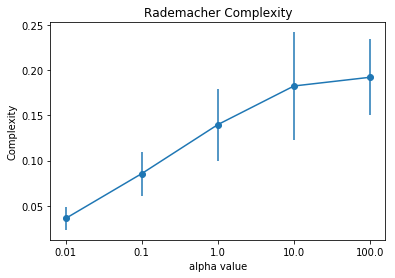

In [9]:
plt.errorbar(np.arange(len(alphas)), means, stds, fmt='-o')
plt.xticks(np.arange(len(alphas)), alphas)
plt.title('Rademacher Complexity')
plt.xlabel('alpha value')
plt.ylabel('Complexity')
plt.show()

На графике можем увидеть линейную зависимость между коэффициентом `L2` регуляризации и сложностью по Радемахеру. Таким образом, мы получаем, что с ростом значения параметра `C` (`alpha`) происходит рост сложности по Радемахеру.